In [2]:
import numpy as np
import math 
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import animation
import random
import pylab

In [3]:
beta_c = 0.5 * math.log(1+2**0.5)

In [4]:
def config_gen(N):
    """ A function to generate a random configuration of the Ising 
        Model of size N by N"""
    matrix = np.random.randint(2, size=(N,N))
    config = np.where(matrix == 0, matrix-1, matrix)
    return(config)

In [5]:
def gibbs(config,beta,h):
    """ A function that gives a full gibbs update for the Ising Model 
        given some inverse temperature beta and external magnetic field h"""
    
    N = np.shape(config)[0]
    
    linear_indices = np.asarray(range(N**2),dtype=int)
    random.shuffle(linear_indices)
    lattice_sites = [(ell//N,ell%N) for ell in linear_indices]
    
    for (i,j) in lattice_sites:
        
    # Update spin (i,j) with Gibbs sample
        node = np.array([i,j])
    
        delta = -1*(config[(node[0]+1)%N,node[1]]+config[(node[0]-1)%N,node[1]]+config[node[0],(node[1]+1)%N]+config[node[0],(node[1]-1)%N]+h)
        q = 1/(1+math.exp(2*beta*delta))
    
        #the rejection bit
        U = np.random.uniform()
        if U < q:
            config[node[0],node[1]] = 1
        else:
            config[node[0],node[1]] = -1
           


In [6]:
def mc_magnetism_for_config_plot(config_0,beta,h,T0):
    """ A function to sample the magentism for an Ising model with
        a given inverse temp beta and external field h, where T is 
        the number of samples required"""
    
    N = np.shape(config_0)[0]
    samples = np.empty(0) #create an empty vector to store the samples
    
    config_seq = 3 * np.ones([T, N, N])

    current_config = config_0
    
    for i in range(T):
        gibbs(current_config,beta,h)
        samples = np.append(samples,np.mean(current_config))
        config_seq[i] = current_config
        
    average = np.mean(samples)
    
    return(average, samples, config_seq)

In [7]:
def mc_magnetism(config_0,beta,h,T,burn_in=0):
    """ A function to sample the magentism for an Ising model with
        a given inverse temp beta and external field h, where T is 
        the number of samples required"""
    
    N = np.shape(config_0)[0]
    samples = np.empty(0) #create an empty vector to store the samples

    current_config = config_0
    
    for i in range(T):
        gibbs(current_config,beta,h)
        samples = np.append(samples,np.mean(current_config))
    
    samples = samples[burn_in:]
    return(samples)

In [8]:
# Test the functions

config_0 = config_gen(32)
mc_magnetism(config_0,0.125,0,10)

array([-0.02539062,  0.06835938,  0.07226562,  0.05859375, -0.0078125 ,
        0.08007812,  0.00195312,  0.04101562,  0.046875  ,  0.01953125])

In [10]:
# Saving Some Samples
config_0_8 = config_gen(8)
config_0_16 = config_gen(16)
config_0_32 = config_gen(32)
config_0_64 = config_gen(64)
config_0_128 = config_gen(128)


#beta_c
#samples_beta_c_8 = mc_magnetism(config_0_8,beta_c,0,10000)
#np.save("samples_beta_c_8", samples_beta_c_8)
#print('8')
#samples_beta_c_16 = mc_magnetism(config_0_16,beta_c,0,10000)
#np.save("samples_beta_c_16", samples_beta_c_16)
#print('16')
#samples_beta_c_32 = mc_magnetism(config_0_32,beta_c,0,10000)
#np.save("samples_beta_c_32", samples_beta_c_32)
#print('32')
#samples_beta_c_64 = mc_magnetism(config_0_64,beta_c,0,10000)
#np.save("samples_beta_c_64", samples_beta_c_64)
#print('64')
#samples_beta_c_128 = mc_magnetism(config_0_128,beta_c,0,10000)
#np.save("samples_beta_c_128", samples_beta_c_128)

#lower than beta_c
samples_beta_low_8 = mc_magnetism(config_0_8,0.5*beta_c,0,10000)
np.save("samples_beta_low_8", samples_beta_low_8)
print('---')
samples_beta_low_16 = mc_magnetism(config_0_16,0.5*beta_c,0,10000)
np.save("samples_beta_low_16", samples_beta_low_16)
print('---')
samples_beta_low_32 = mc_magnetism(config_0_32,0.5*beta_c,0,10000)
np.save("samples_beta_low_32", samples_beta_low_32)
print('---')
samples_beta_low_64 = mc_magnetism(config_0_64,0.5*beta_c,0,10000)
np.save("samples_beta_low_64", samples_beta_low_64)
print('---')
samples_beta_low_128 = mc_magnetism(config_0_128,0.5*beta_c,0,10000)
np.save("samples_beta_low_128", samples_beta_low_128)
print('---')

#higher than beta_c
#samples_beta_high_32 = mc_magnetism(config_0_32,2*beta_c,0,1000)
#np.save("samples_beta_high_32", samples_beta_high_32)
#samples_beta_high_64 = mc_magnetism(config_0_64,2*beta_c,0,1000)
#np.save("samples_beta_high_64", samples_beta_high_64)
#samples_beta_high_128 = mc_magnetism(config_0_128,2*beta_c,0,1000)
#np.save("samples_beta_high_128", samples_beta_high_128)

---


KeyboardInterrupt: 

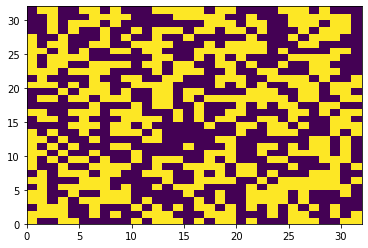

In [23]:
Z = config_gen(32)
plt.pcolor(Z)
plt.show()

In [ ]:
cmaps['Perceptually Uniform Sequential'] = [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']

cmaps['Sequential'] = [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

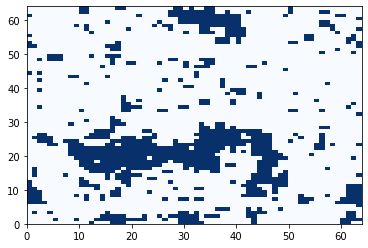

In [18]:
config = config_gen(64)
for i in range(1000):
    gibbs(config,beta_c,0)

plt.pcolor(config, cmap = 'Blues')
plt.show()

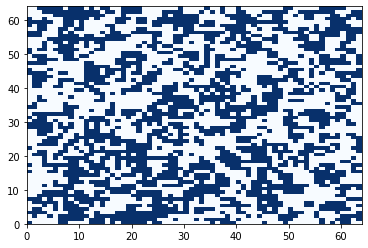

In [19]:
config = config_gen(64)
for i in range(1000):
    gibbs(config,0.5*beta_c,0)

plt.pcolor(config, cmap = 'Blues')
plt.show()

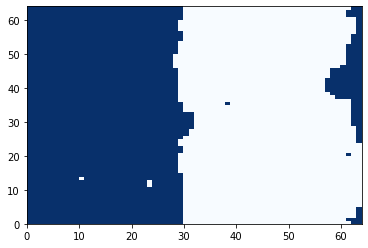

In [20]:
config = config_gen(64)
for i in range(1000):
    gibbs(config,2*beta_c,0)

plt.pcolor(config, cmap = 'Blues')
plt.show()

In [ ]:
# The 

# Susceptibility

In [9]:
def mc_susceptibility(config_0,beta,h,T,burn_in=0):
    """ A function to sample the magentism for an Ising model with
        a given inverse temp beta and external field h, where T is 
        the number of samples required"""
    
    N = np.shape(config_0)[0]
    
    mu = 0
    mu_2 = 0
    mu_4 = 0
    
    current_config = config_0
    
    for i in range(burn_in):
        gibbs(current_config,beta,h)
    
    for i in range(1,T+1):
        gibbs(current_config,beta,h)
        Q = np.mean(current_config)
        mu = mu + (Q-mu)/i
        mu_2 = mu_2 + (Q**2-mu_2)/i
        mu_4 = mu_4 + (Q**4-mu_4)/i
    
    susceptibility = beta * (mu_2 - mu**2)
    error = beta * np.sqrt((mu_4-mu_2**2)/(T-1)+ 4* mu**2*((mu_2-mu**2)/(T-1)))
    
    print('susceptibility: ',susceptibility)
    print('error: ',error)
    return(susceptibility,error)

In [10]:
config_0 = config_gen(4)
mc_susceptibility(config_0,beta_c,0,10000,burn_in=10000)

KeyboardInterrupt: 

In [ ]:
config_0 = config_gen(8)
mc_susceptibility(config_0,beta_c,0,10000,burn_in=10000)

In [12]:
config_0 = config_gen(16)
mc_susceptibility(config_0,beta_c,0,10000,burn_in=10000)

susceptibility:  0.20214370219442848
error:  0.0018259037979085142


(0.20214370219442848, 0.0018259037979085142)

In [13]:
config_0 = config_gen(32)
mc_susceptibility(config_0,beta_c,0,10000,burn_in=10000)

susceptibility:  0.17069776440313422
error:  0.0009690933826487113


(0.17069776440313422, 0.0009690933826487113)

In [11]:
def mc_susceptibility_for_IACT(config_0,beta,h,T,burn_in=0):
    """ A function to sample the susceptibility for an Ising model with
        a given inverse temp beta and external field h, where T is 
        the number of samples required"""
    
    N = np.shape(config_0)[0]
    samples = np.empty(0) #create an empty vector to store the samples

    current_config = config_0
    
    for i in range(T):
        gibbs(current_config,beta,h)
        samples = np.append(samples,beta*np.mean(current_config)**2)
    
    samples = samples[burn_in:]
    return(samples)
    

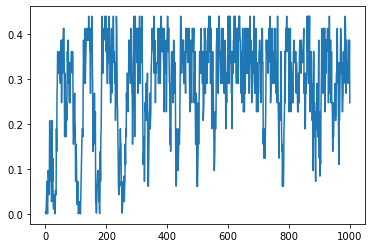

In [14]:
config_0 = config_gen(8)
samples = mc_susceptibility_for_IACT(config_0,beta_c,0,1000,burn_in=0)
plt.plot(samples)
plt.show()

In [16]:
# Saving Some Samples

config_0_4 = config_gen(4)
config_0_8 = config_gen(8)
config_0_16 = config_gen(16)
config_0_32 = config_gen(32)


#beta_c

#samples_beta_c_4_sus = mc_susceptibility_for_IACT(config_0_4,beta_c,0,20000,10000)
#np.save("samples_beta_c_4_sus", samples_beta_c_4_sus)
print('4')

#samples_beta_c_8_sus = mc_susceptibility_for_IACT(config_0_8,beta_c,0,20000,10000)
#np.save("samples_beta_c_8_sus", samples_beta_c_8_sus)
print('8')

#samples_beta_c_16_sus = mc_susceptibility_for_IACT(config_0_16,beta_c,0,20000,10000)
#np.save("samples_beta_c_16_sus", samples_beta_c_16_sus)
print('16')

samples_beta_c_32_sus = mc_susceptibility_for_IACT(config_0_32,beta_c,0,20000,10000)
np.save("samples_beta_c_32_sus", samples_beta_c_32_sus)
print('32')

4
8
16
32


In [15]:
# Saving Some Samples
config_0_3 = config_gen(3)
config_0_4 = config_gen(4)
config_0_5 = config_gen(5)
config_0_6 = config_gen(6)



#beta_c
samples_beta_c_3_sus = mc_susceptibility_for_IACT(config_0_3,beta_c,0,20000,10000)
np.save("samples_beta_c_3_sus", samples_beta_c_3_sus)
print('3')

samples_beta_c_4_sus = mc_susceptibility_for_IACT(config_0_4,beta_c,0,20000,10000)
np.save("samples_beta_c_4_sus", samples_beta_c_4_sus)
print('4')

samples_beta_c_5_sus = mc_susceptibility_for_IACT(config_0_5,beta_c,0,20000,10000)
np.save("samples_beta_c_5_sus", samples_beta_c_5_sus)
print('5')

samples_beta_c_6_sus = mc_susceptibility_for_IACT(config_0_6,beta_c,0,20000,10000)
np.save("samples_beta_c_6_sus", samples_beta_c_6_sus)
print('6')

3
4
5
6


In [14]:
# Saving Some Samples
config_0_8 = config_gen(8)




#beta_c
samples_beta_c_8_sus = mc_susceptibility_for_IACT(config_0_8,beta_c,0,20000,10000)
np.save("samples_beta_c_8_sus", samples_beta_c_8_sus)
